# Steven Granaturov Assignment Week 5 #

#### Imports & Load Data ####

In [46]:
import pandas as pd
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import graphviz

data = pd.read_csv('DataSetForPhishingVSBenignUrl.csv')

#### Create copy of dataframe ####

In [47]:
df = data.copy()

df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


#### Check how many classes are in this dataset, and their distribution ####

Text(0, 0.5, 'Count')

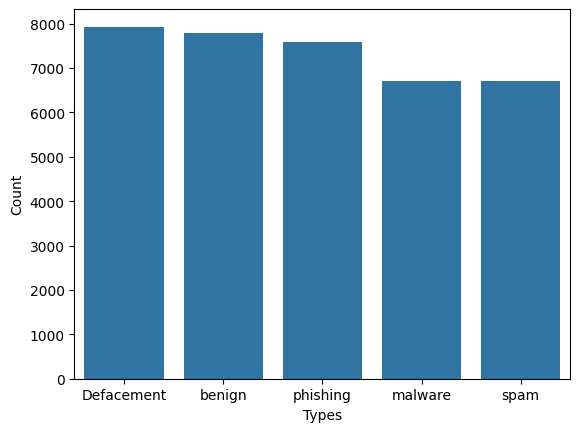

In [48]:
y = df['URL_Type_obf_Type']

y_count = y.index

count = df['URL_Type_obf_Type'].value_counts()

sns.barplot(x = count.index, y = count)
plt.xlabel('Types')
plt.ylabel('Count')

#### Remove entries with NaN and inf values. They pose difficulties to decision tree models ####

In [49]:
df = df.dropna()

print(len(df))

feature_names = df.columns[:79]
print(feature_names)

18982
Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPat

#### Creation of X & y and Scaling the data ####

In [50]:
X = df.iloc[: , :79]
y = df['URL_Type_obf_Type']

class_names = y.unique()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Split data into 20% testing size and 80% training size ####

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size = 0.2, random_state = 100)

#### Gini Decision Tree (MaxDepth = 1) ####

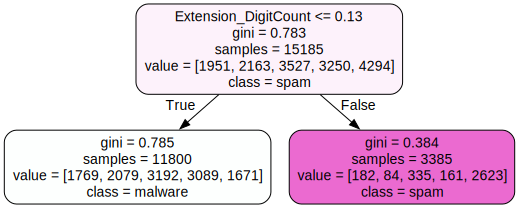

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

# Decision Tree classifier with criteria - Gini Index
tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=1)
tree_gini.fit(X_train, y_train)

# Visualizing the Gini Index based Decision Tree
graph_data = tree.export_graphviz(tree_gini, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Gini Decision Tree (MaxDepth = 1) ####

In [53]:
y_pred_gini = tree_gini.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Gini Index is: ", accuracy_score(y_test,y_pred_gini) * 100, " %")


Accuracy for Decision Tree with criteria as Gini Index is:  38.82012114827496  %


#### Entropy Decision Tree (MaxDepth = 1) ####

In [54]:
tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=1)
tree_entropy.fit(X_train, y_train)

# Visualizing the Entropy based Decision Tree
graph_data = tree.export_graphviz(tree_entropy, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=50)

#### Obtain accuracy score for Entropy Decision Tree (MaxDepth = 1) ####

In [56]:
y_pred_entropy = tree_entropy.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Entropy Index is: ", accuracy_score(y_test,y_pred_entropy) * 100, " %")


Accuracy for Decision Tree with criteria as Entropy Index is:  40.479325783513296  %


#### Gini Decision Tree (MaxDepth = 2) ####

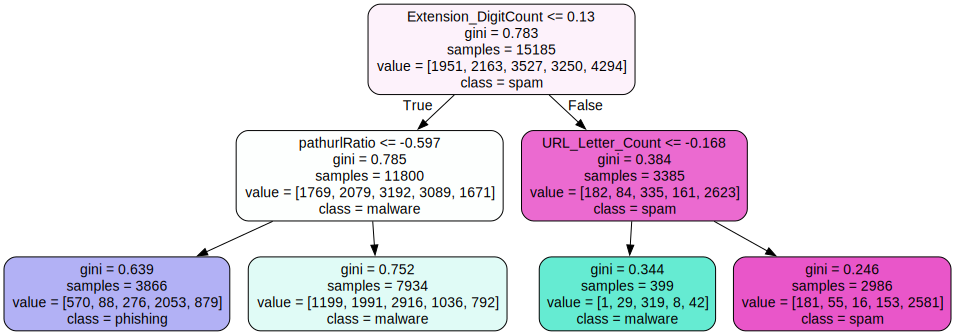

In [57]:
tree_gini2 = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=2)
tree_gini2.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_gini2, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Gini Decision Tree (MaxDepth = 2) ####

In [58]:
y_pred_gini2 = tree_gini2.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Gini Index is: ", accuracy_score(y_test,y_pred_gini2) * 100, " %")


Accuracy for Decision Tree with criteria as Gini Index is:  51.46168027390045  %


#### Entropy Decision Tree (MaxDepth = 2) ####

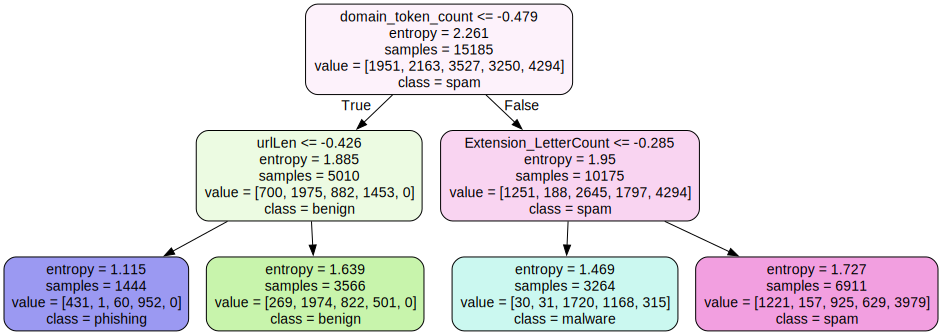

In [59]:
tree_entropy2 = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=2)
tree_entropy2.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_entropy2, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Entropy Decision Tree (MaxDepth = 2) ####

In [60]:
y_pred_entropy2 = tree_entropy2.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Entropy Index is: ", accuracy_score(y_test,y_pred_entropy2) * 100, " %")


Accuracy for Decision Tree with criteria as Entropy Index is:  56.01790887542797  %


#### Gini Decision Tree (MaxDepth = 3) ####

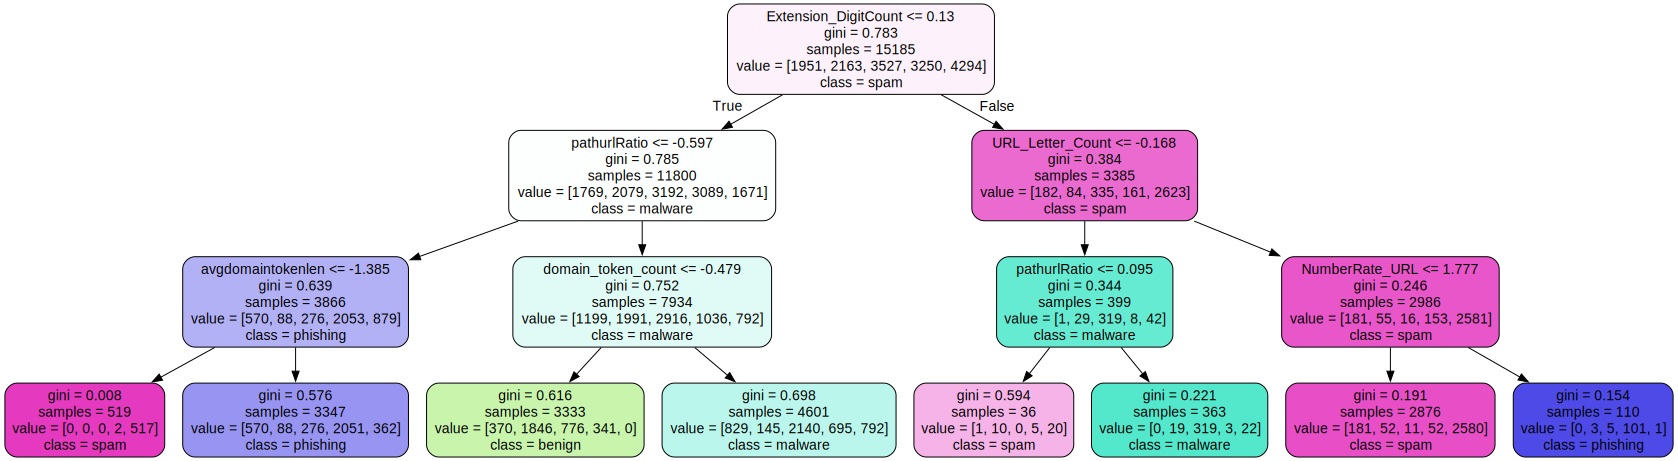

In [61]:
tree_gini3 = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=3)
tree_gini3.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_gini3, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Gini Decision Tree (MaxDepth = 3) ####

In [62]:
y_pred_gini3 = tree_gini3.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Gini Index is: ", accuracy_score(y_test,y_pred_gini3) * 100, " %")


Accuracy for Decision Tree with criteria as Gini Index is:  62.812746905451675  %


#### Entropy Decision Tree (MaxDepth = 3) ####

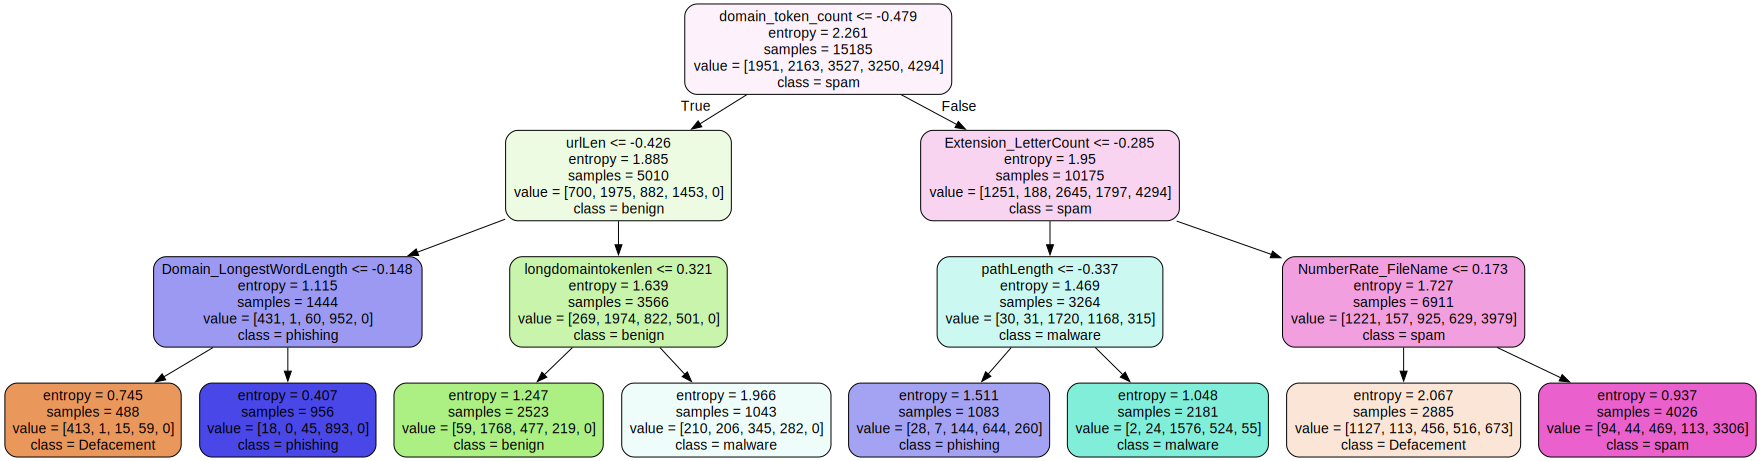

In [63]:
tree_entropy3 = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=3)
tree_entropy3.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_entropy3, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Entropy Decision Tree (MaxDepth = 3) ####

In [64]:
y_pred_entropy3 = tree_entropy3.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Entropy Index is: ", accuracy_score(y_test,y_pred_entropy3) * 100, " %")


Accuracy for Decision Tree with criteria as Entropy Index is:  67.07927311035029  %


#### Gini Decision Tree (MaxDepth = 4) ####

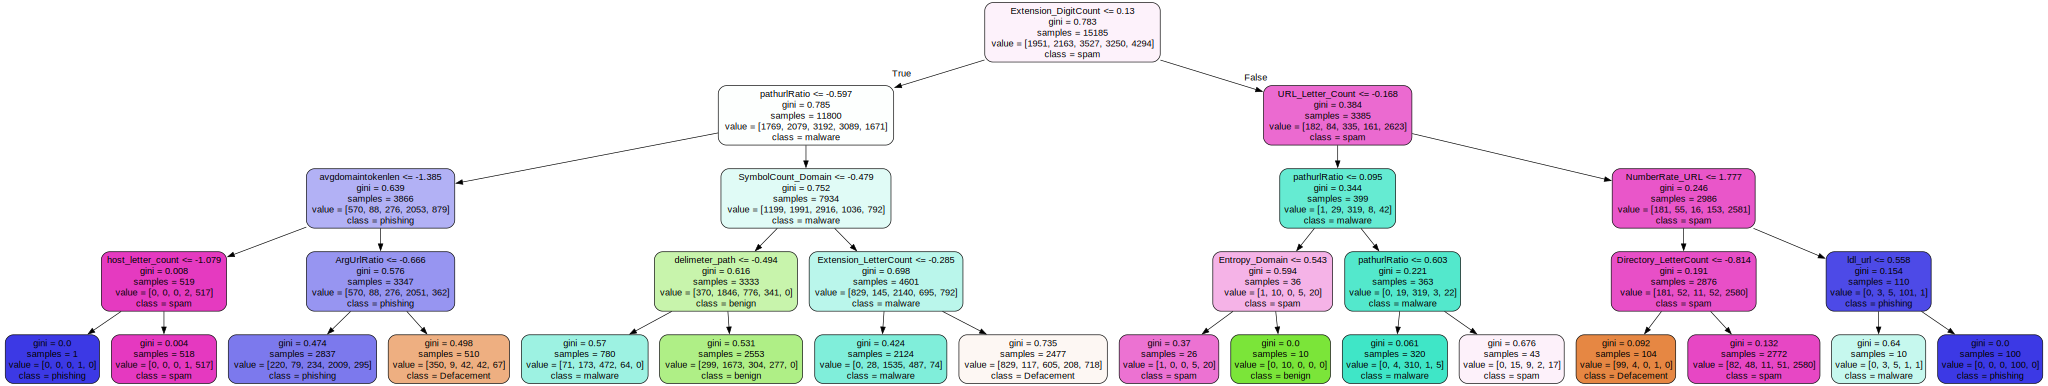

In [65]:
tree_gini4 = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=4)
tree_gini4.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_gini4, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Gini Decision Tree (MaxDepth = 4) ####

In [66]:
y_pred_gini4 = tree_gini4.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Gini Index is: ", accuracy_score(y_test,y_pred_gini4) * 100, " %")


Accuracy for Decision Tree with criteria as Gini Index is:  70.05530682117461  %


#### Entropy Decision Tree (MaxDepth = 4) ####

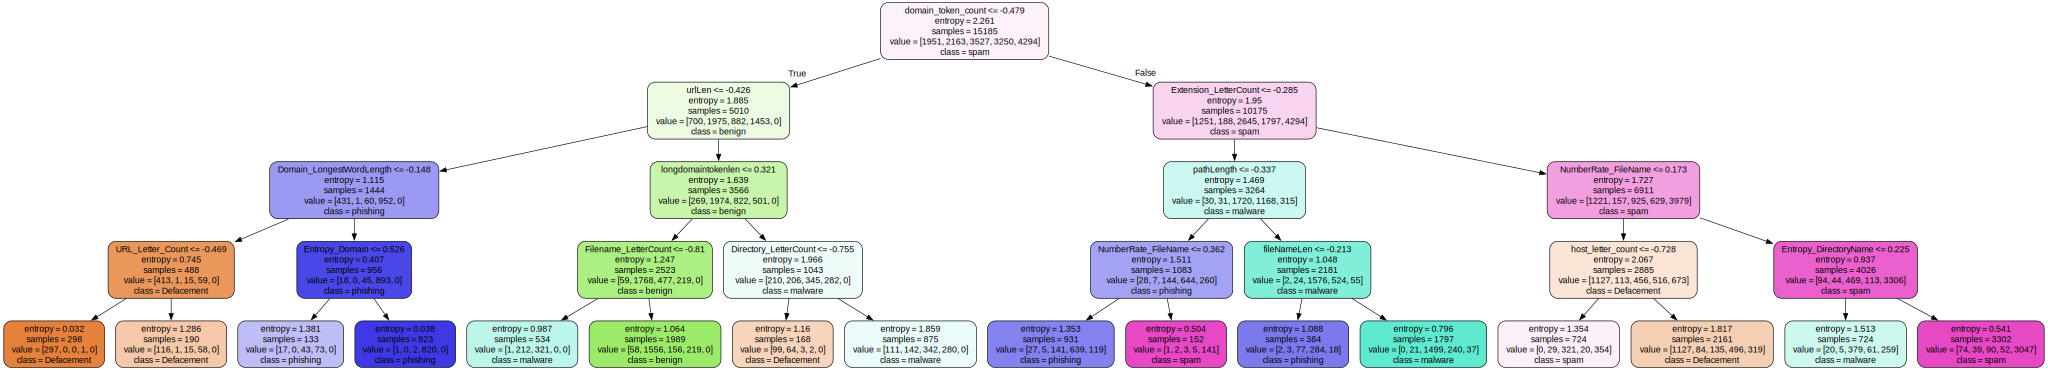

In [67]:
tree_entropy4 = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=4)
tree_entropy4.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_entropy4, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Entropy Decision Tree (MaxDepth = 4) ####

In [68]:
y_pred_entropy4 = tree_entropy4.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Entropy Index is: ", accuracy_score(y_test,y_pred_entropy4) * 100, " %")


Accuracy for Decision Tree with criteria as Entropy Index is:  73.18936002106926  %


#### Gini Decision Tree (MaxDepth = 5) ####

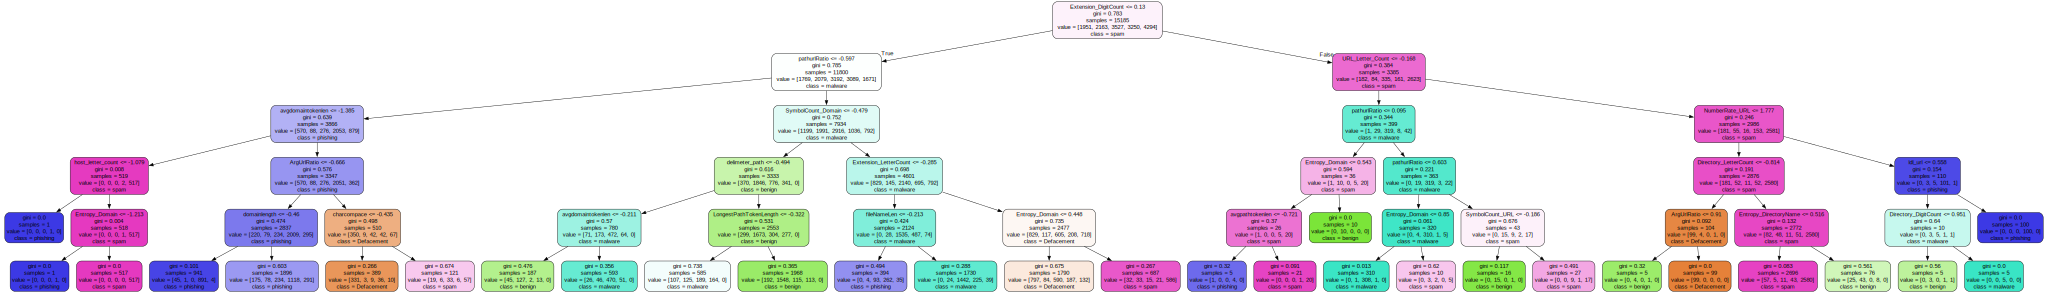

In [69]:
tree_gini5 = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=5)
tree_gini5.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_gini5, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Gini Decision Tree (MaxDepth = 5) ####

In [70]:
y_pred_gini5 = tree_gini5.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Gini Index is: ", accuracy_score(y_test,y_pred_gini5) * 100, " %")


Accuracy for Decision Tree with criteria as Gini Index is:  75.4806426125889  %


#### Entropy Decision Tree (MaxDepth = 5) ####

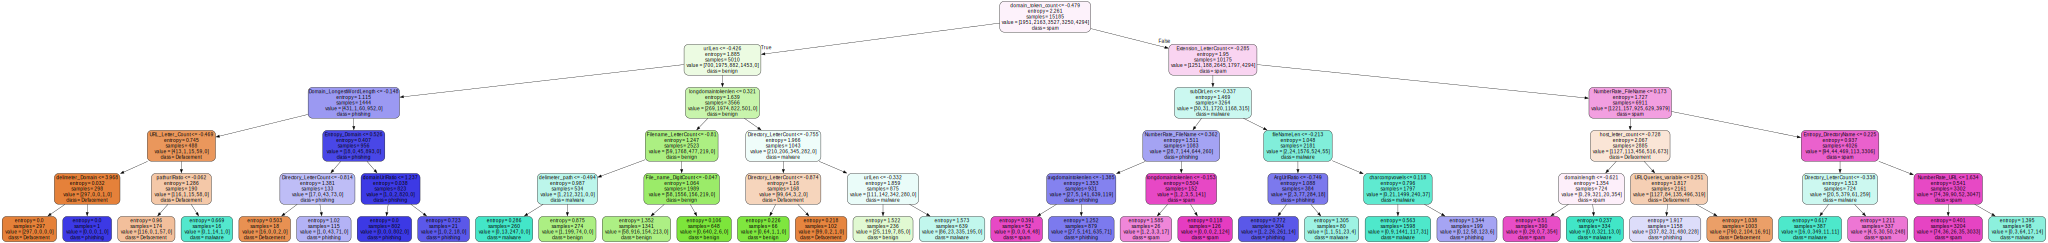

In [71]:
tree_entropy5 = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=5)
tree_entropy5.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_entropy5, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Entropy Decision Tree (MaxDepth = 5) ####

In [72]:
y_pred_entropy5 = tree_entropy5.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Entropy Index is: ", accuracy_score(y_test,y_pred_entropy5) * 100, " %")


Accuracy for Decision Tree with criteria as Entropy Index is:  80.74795891493284  %


#### Gini Decision Tree (MaxDepth = 6) ####

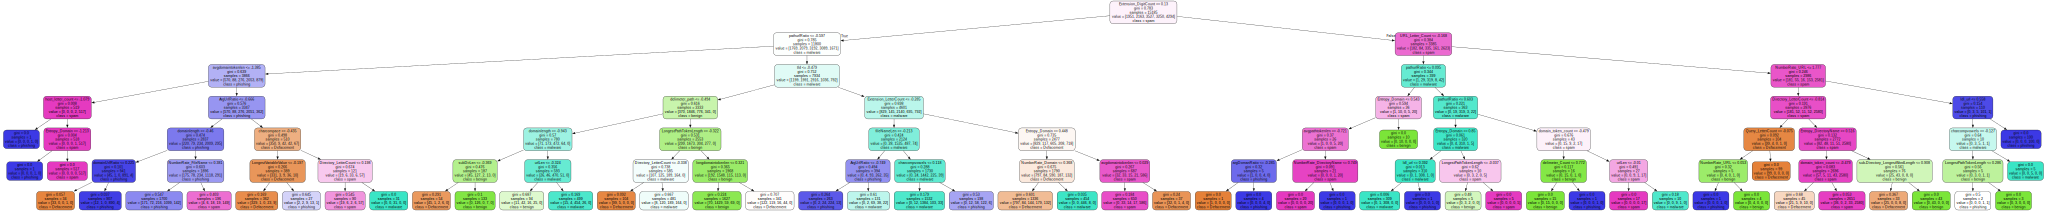

In [73]:
tree_gini6 = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=6)
tree_gini6.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_gini6, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Gini Decision Tree (MaxDepth = 6) ####

In [74]:
y_pred_gini6 = tree_gini6.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Gini Index is: ", accuracy_score(y_test,y_pred_gini6) * 100, " %")


Accuracy for Decision Tree with criteria as Gini Index is:  81.64340268633131  %


#### Entropy Decision Tree (MaxDepth = 6) ####

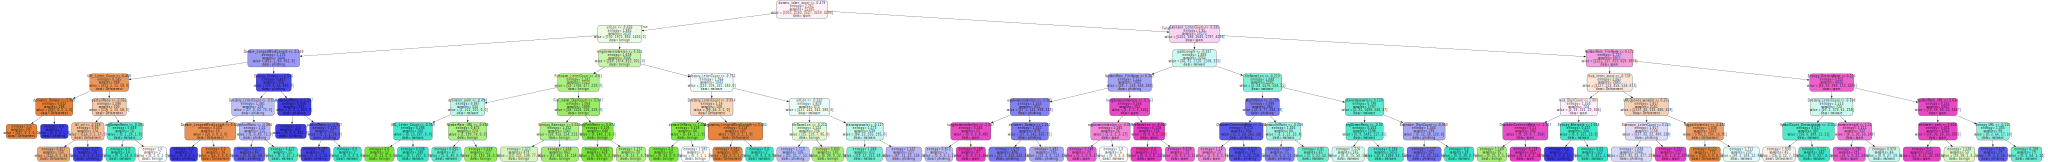

In [75]:
tree_entropy6 = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=6)
tree_entropy6.fit(X_train, y_train)

graph_data = tree.export_graphviz(tree_entropy6, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

#### Obtain accuracy score for Entropy Decision Tree (MaxDepth = 6) ####

In [76]:
y_pred_entropy6 = tree_entropy6.predict(X_test)

# Accuracy for Decision Tree classifier with criterion as gini index
print("Accuracy for Decision Tree with criteria as Entropy Index is: ", accuracy_score(y_test,y_pred_entropy6) * 100, " %")


Accuracy for Decision Tree with criteria as Entropy Index is:  84.77745588622597  %
